<span style="color: Blue;">**Support Vector Machine(SVM) for Classification**</span>

**Description:** Implement a Support Vector Machine (SVM) model for binary classification.

**Objectives:**

Train an SVM model on a labeled dataset. **|** Use different kernels(linear, RBF) and compare performance. **|** Visualize the decision boundary. **|** Evaluate the model using accuracy, precision, recall, and AUC.

**Tools:** Python, scikit-learn, pandas, matplotlib


In [ ]:
# Imporing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset and displaying the first 5 rows
df = pd.read_csv('churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


<span style="color: Blue;">**Data Cleaning and Preparation**</span>


In [ ]:
# Counting the total missing values in the dataset
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Extract only numeric columns
numeric_df = df.select_dtypes(include='number')
numeric_df.head(2)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4


In [ ]:
# Extract only categorical / object columns
non_numeric_df = df.select_dtypes(exclude='number')

non_numeric_df.head(2)

,State,International plan,Voice mail plan,Churn
0,LA,No,No,False
1,IN,No,No,True


In [ ]:
# Identifying Categorical columns
categorical_cols = ['State', 'International plan', 'Voice mail plan']

In [ ]:
# Importing necoding Tools
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Initializing the encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fitting and transforming only categorical columns
encoded = ohe.fit_transform(df[categorical_cols])

# Converting back to DataFrame with column names
encoded_df = pd.DataFrame(encoded,
                          columns=ohe.get_feature_names_out(categorical_cols),
                          index=df.index)

# Concatenate with the original dataframe and dropping the old categorical columns
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Displaying the first 5 rows of the dataset after encoding
df_encoded.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reordering columns so that 'Churn' is the last column
cols = [col for col in df_encoded.columns if col != 'Churn'] + ['Churn']
df_encoded = df_encoded[cols]

# Preview the reordered dataset
df_encoded.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Churn
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [ ]:
# Importing Scaler for numeric features
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transforming numeric features
numeric_scaled = scaler.fit_transform(numeric_df)

In [ ]:
# Converting scaled numeric array back to DataFrame
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_df.columns, index=df_encoded.index)

# Replacing original numeric columns in df_encoded with scaled values
df_encoded[numeric_df.columns] = numeric_scaled_df

# Previewing the updated dataset
df_encoded.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Churn
0,0.347127,-0.674397,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,-0.927731,-0.506741,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,1.425853,-0.506741,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,0.200028,-0.506741,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,-1.319994,1.768601,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
# Defining features (X) and target (y)
X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

In [ ]:
# Checkiing target variable distribution
y.value_counts()

,count
Churn,
False,572
True,95


In [ ]:
# Splittling data into training and test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Since the Churn dataset is imbalanced (572 False vs 95 True), I will use **class_weight='balanced'** to give more importance to the minority class and improve prediction performance for churned customers.

I will use **scoring='f1'** in GridSearchCV instead of accuracy because the dataset is imbalanced. F1-score balances precision and recall, giving a better measure of model performance on the minority class (Churn=True).

<span style="color: Red;">**Support Vector Classifier with Linear Kernel**</span>

<span style="color: Blue;">**Model Tuning**</span>


In [ ]:
# Initialize Linear SVM with balanced class weights
svc_linear = SVC(kernel='linear', class_weight='balanced')

# Define hyperparameter grid
param_grid_linear = {
    'C': [0.1, 1, 10, 100]
}

# Setup GridSearchCV with F1-score for imbalanced dataset
grid_search_linear = GridSearchCV(
    estimator=svc_linear,
    param_grid=param_grid_linear,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fitting GridSearch to training data
grid_search_linear.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', kernel='linear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]}, scoring='f1',
             verbose=2)

In [ ]:
# # Displaying best hyperparameters and cross-validation score
print("Best parameters:", grid_search_linear.best_params_)
print("Best cross-validation F1-score:", grid_search_linear.best_score_)

Best parameters: {'C': 0.1}
Best cross-validation F1-score: 0.45600570926657885


In [ ]:
# Using the best estimator from GridSearchCV
best_svc_db = grid_search_linear.best_estimator_

In [ ]:
# First two column names
X_test.columns[:2].tolist()

['Account length', 'Area code']

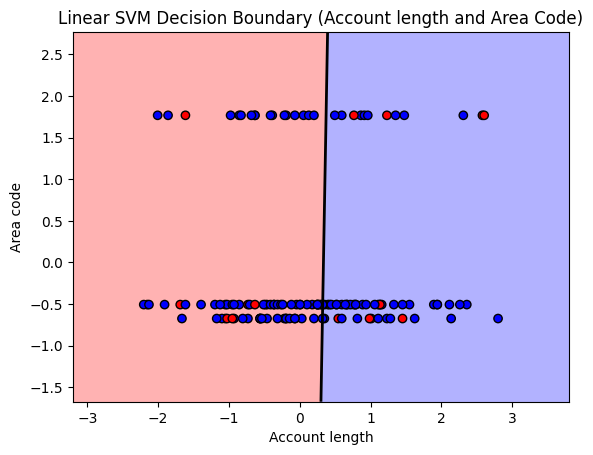

In [ ]:
# Selecting first two features for visualization
X_vis = X_test.iloc[:, :2]
y_vis = y_test

# Fitting the SVM again on the 2 features
best_svc_db = SVC(kernel='linear', C=0.1, class_weight='balanced')
best_svc_db.fit(X_vis, y_vis)

# Create a grid over the feature space
xx, yy = np.meshgrid(
    np.linspace(X_vis.iloc[:,0].min()-1, X_vis.iloc[:,0].max()+1, 500),
    np.linspace(X_vis.iloc[:,1].min()-1, X_vis.iloc[:,1].max()+1, 500)
)

# Computing the decision function for each point in the grid
Z = best_svc_db.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['red', 'blue'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

# Plottng the actual test points
plt.scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y_vis.map({False:0, True:1}), cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel('Account length')
plt.ylabel('Area code')
plt.title('Linear SVM Decision Boundary (Account length and Area Code)')
plt.show()

Points on one side of the black line are predicted as False, on the other side as True.
Most points are False (blue), so the boundary is skewed toward the smaller True class.

<span style="color: Blue;">**Evaluate Model Performance (Linear Kernel SVM)**</span>


In [ ]:
best_svc_lin = grid_search_linear.best_estimator_

In [ ]:
# Predict on test set
y_pred = best_svc_lin.predict(X_test)

In [ ]:
# Classification Report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.69      0.80       114
        True       0.31      0.80      0.45        20

    accuracy                           0.71       134
   macro avg       0.63      0.75      0.63       134
weighted avg       0.86      0.71      0.75       134



Accuracy = 0.71; Out of all 134 predictions, 71% were correct.

Precision = 0.86 (weighted); On average, when the model predicts a sample as a certain class, it is correct 86% of the time, considering the number of samples in each class.

Recall = 0.71 (weighted); On average, the model correctly identifies 71% of all actual samples.

In [ ]:
# Computing ROC AUC for Best Linear SVM Model
best_svc = grid_search_linear.best_estimator_
y_scores_linear = best_svc.decision_function(X_test)
auc_linear = roc_auc_score(y_test, y_scores_linear)
print("Linear SVM AUC:", auc_linear)

Linear SVM AUC: 0.7763157894736842


Linear SVM AUC = 0.7763; The model  distinguish True from False samples, with about a 77.6% chance.

<span style="color: Red;">**Support Vector Classifier with RBF Kernel**</span>

<span style="color: Blue;">**Model Tuning**</span>

In [ ]:
# Initialize RBF SVM with balanced class weights
svc_rbf = SVC(kernel='rbf', class_weight='balanced')

In [ ]:
# Define hyperparameter grid
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

# Setup GridSearchCV with F1-score for imbalanced dataset
grid_search_rbf = GridSearchCV(
    estimator=svc_rbf,
    param_grid=param_grid_rbf,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearch to training data
grid_search_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale']},
             scoring='f1', verbose=2)

In [ ]:
# Print best parameters and F1-score
print("Best parameters (RBF SVM):", grid_search_rbf.best_params_)
print("Best cross-validation F1-score:", grid_search_rbf.best_score_)

Best parameters (RBF SVM): {'C': 10, 'gamma': 0.01}
Best cross-validation F1-score: 0.6277320075035459


<span style="color: Blue;">**Decision Boundry (RBF Kernel SVM)**</span>

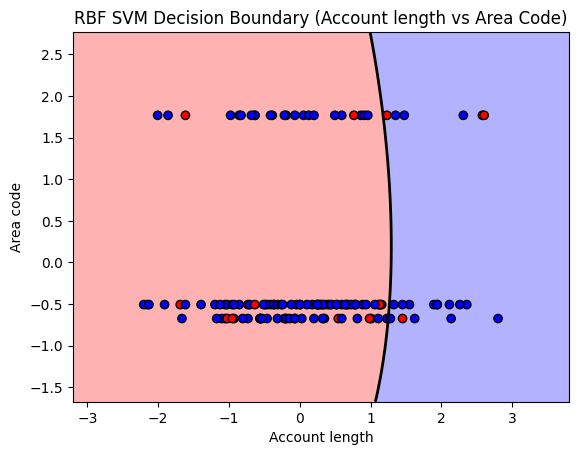

In [ ]:
# Selecting first two features for visualization (RBF SVM)
X_vis1 = X_test[['Account length', 'Area code']]
y_vis1 = y_test

# Fit RBF SVM on the selected features
best_svc_db1 = SVC(kernel='rbf', C=10, gamma=0.01, class_weight='balanced')
best_svc_db1.fit(X_vis1, y_vis1)


# Creating a grid over the feature space

xx, yy = np.meshgrid(
    np.linspace(X_vis1.iloc[:, 0].min() - 1, X_vis1.iloc[:, 0].max() + 1, 500),
    np.linspace(X_vis1.iloc[:, 1].min() - 1, X_vis1.iloc[:, 1].max() + 1, 500)
)

# Computing the decision function for each point in the grid
Z = best_svc_db1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['red', 'blue'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

# Plotting the actual test points
plt.scatter(
    X_vis1.iloc[:, 0],
    X_vis1.iloc[:, 1],
    c=y_vis1.map({False: 0, True: 1}),
    cmap=plt.cm.bwr,
    edgecolors='k'
)

plt.xlabel('Account length')
plt.ylabel('Area code')
plt.title('RBF SVM Decision Boundary (Account length vs Area Code)')
plt.show()

In [ ]:
best_svc = grid_search_rbf.best_estimator_

<span style="color: Blue;">**Evaluate Model Performance (RBF Kernel SVM)**</span>

In [ ]:
# Predict test set  with best RBF SVM
y_pred = grid_search_rbf.predict(X_test)

In [ ]:
# Classification Report for RBF Kernel SVM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91       114
        True       0.48      0.60      0.53        20

    accuracy                           0.84       134
   macro avg       0.70      0.74      0.72       134
weighted avg       0.86      0.84      0.85       134



Accuracy = 0.84; Out of all 134 predictions, 84% were correct.

Precision = 0.86 (weighted); On average, when the model predicts a sample as a certain class, it is correct 86% of the time.

Recall = 0.84 (weighted); On average, the model correctly identifies 84% of the actual samples of each class.

In [ ]:
# Comput ROC AUC for Best RBF Kernel SVM
best_svc = grid_search_rbf.best_estimator_
y_scores_rbf = best_svc.decision_function(X_test)
auc_rbf = roc_auc_score(y_test, y_scores_rbf)
print("RBF SVM AUC:", auc_rbf)

RBF SVM AUC: 0.7850877192982457


RBF SVM is effective at separating churners from non-churners, with a strong likelihood of correct ranking at 78.5%.

<span style="color: Blue;">**Conclusion:**</span>

The RBF SVM outperforms the Linear SVM on this dataset, achieving higher accuracy (0.84 vs 0.71) and better recall (0.84 vs 0.71), which means it identifies more of the actual positive samples, including the minority class. Both models have similar precision (0.86), indicating that their predictions are generally reliable when they classify a sample. Additionally, the AUC of the RBF SVM (0.79) is slightly higher than that of the Linear SVM (0.78), confirming its superior ability to separate the two classes.

# *I would greatly appreciate it if you could take the time to review my work and provide feedback on areas where I can improve. Your guidance would be invaluable in helping me enhance the quality of my work.*